In [13]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_resnet_v2 import InceptionResnetV2
from keras.applications.vgg19 import VGG19
# from tensorflow.keras.applications.inception_v3 import preprocess_input
#from keras.applications.resnet import ResNet50
from keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [14]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/home/vimalkumar/Documents/Stewart/CNN/Cnn'
#valid_path = '/home/vimalkumar/Documents/softco/CNN/CNN/test'

In [15]:
vgg19_model = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [16]:
# don't train existing weights
for layer in vgg19_model.layers:
    layer.trainable = False

In [17]:
folders = glob('/home/vimalkumar/Documents/Stewart/CNN/Cnn/*')


In [18]:
x = Flatten()(vgg19_model.output)


In [19]:
prediction = Dense(len(folders), activation='sigmoid')(x)

# create a model object
model = Model(inputs=vgg19_model.input, outputs=prediction)

In [20]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [21]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                  validation_split=0.2)

#test_datagen = ImageDataGenerator(rescale = 1./255)

In [22]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical',
                                                subset = 'training',
                                                 shuffle=True)

test_set = train_datagen.flow_from_directory(train_path,
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical',
                                           subset = 'validation')

Found 8348 images belonging to 2 classes.
Found 2086 images belonging to 2 classes.


In [23]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=1,
  #steps_per_epoch=len(training_set),
  #validation_steps=len(test_set)
)

/home/vimalkumar/Documents/Python_new_1/cde_venv/lib/python3.8/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


131/131 [==============================] - 2091s 16s/step - loss: 0.1979 - accuracy: 0.9172 - val_loss: 0.1038 - val_accuracy: 0.9645


In [25]:
model.save('stewart_vgg19_model_1.h5')

In [26]:
import os
import keras
from keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd

In [27]:
model = keras.models.load_model('stewart_vgg19_model_1.h5')

In [28]:
dic = {0:'Blank',1:'Not Blank'}

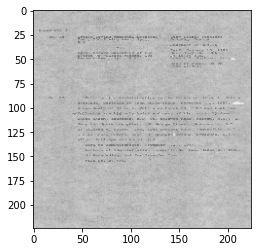

[[0.02770978 0.9906857 ]]
Not Blank


In [31]:
path = '/home/vimalkumar/Downloads/bad quality/1424.jpeg'


img = image.load_img(path, 
                     target_size=(224,224))
plt.imshow(img)
plt.show()

x = image.img_to_array(img)
x = x/255
x = np.expand_dims(x,axis=0)
images = np.vstack([x])
val = model.predict(images)
print(val)
    
a=np.argmax(val,axis=1)
print(dic[a[0]])

1435.jpeg


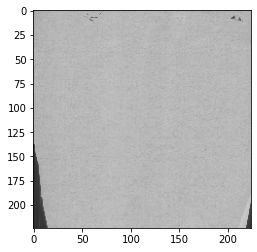

[[0.6573594  0.43304235]]
Blank
1437.jpeg


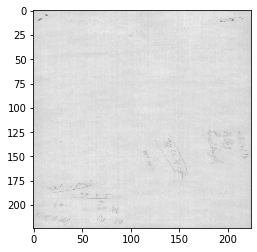

[[0.65448374 0.5191736 ]]
Blank
1441.jpeg


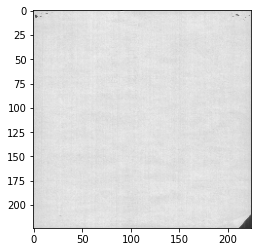

[[0.78495055 0.30650902]]
Blank
1443.jpeg


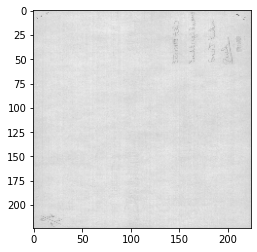

[[0.71194935 0.4419659 ]]
Blank
1453.jpeg


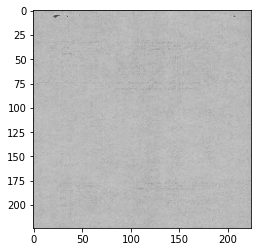

[[0.6973201 0.4094464]]
Blank
1455.jpeg


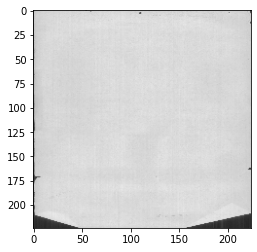

[[0.91778404 0.07600254]]
Blank
1457.jpeg


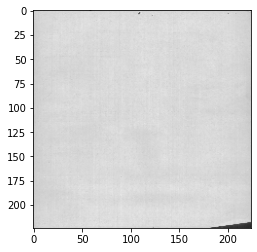

[[0.8979602  0.14352426]]
Blank
1459.jpeg


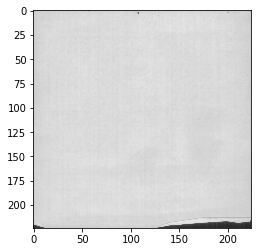

[[0.88008416 0.18220264]]
Blank
1463.jpeg


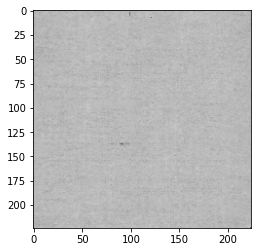

[[0.6956277 0.3899877]]
Blank
1465.jpeg


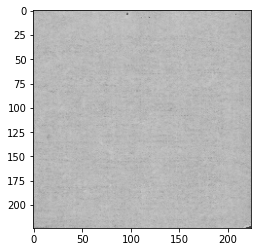

[[0.69365263 0.39160958]]
Blank
1467.jpeg


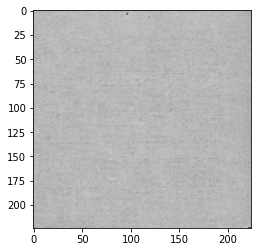

[[0.71820366 0.36252546]]
Blank
1468.jpeg


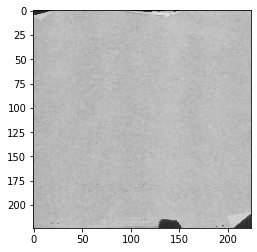

[[0.58570564 0.5032838 ]]
Blank
1470.jpeg


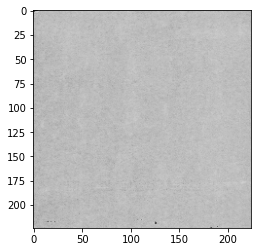

[[0.7677052  0.29921824]]
Blank
1473.jpeg


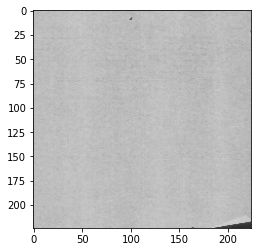

[[0.76055896 0.29892886]]
Blank
1475.jpeg


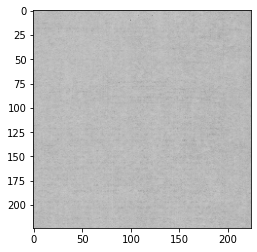

[[0.7166097  0.36410177]]
Blank
1477.jpeg


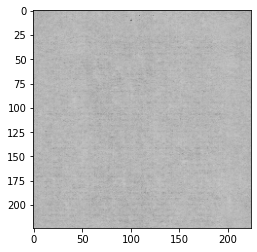

[[0.68297297 0.4200337 ]]
Blank
1479.jpeg


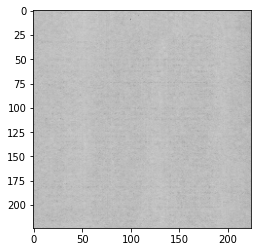

[[0.7366991 0.3517192]]
Blank
1481.jpeg


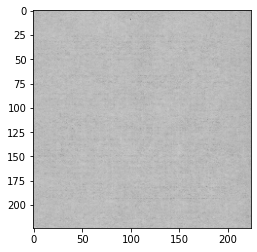

[[0.72020876 0.36006975]]
Blank
1483.jpeg


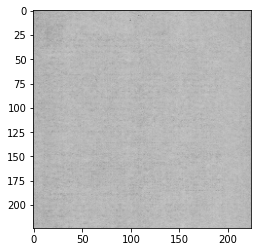

[[0.6921186  0.39823562]]
Blank
1485.jpeg


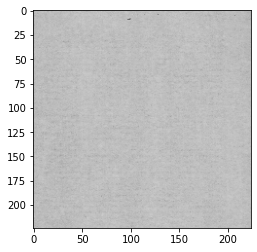

[[0.74208605 0.34103954]]
Blank
1487.jpeg


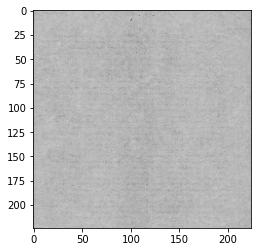

[[0.6190031  0.48061118]]
Blank
1489.jpeg


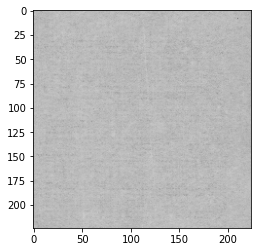

[[0.68826485 0.4046827 ]]
Blank
1491.jpeg


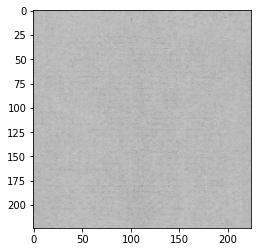

[[0.6800116 0.4155651]]
Blank
1493.jpeg


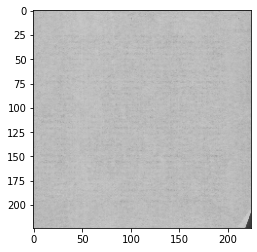

[[0.7302591  0.34307724]]
Blank
1495.jpeg


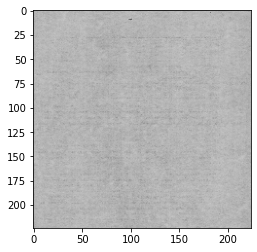

[[0.62455463 0.47846678]]
Blank
1497.jpeg


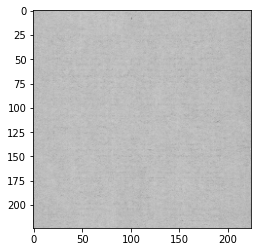

[[0.73946863 0.33964604]]
Blank
1499.jpeg


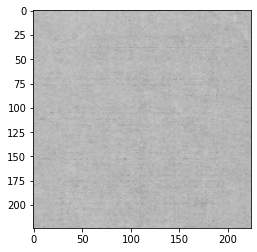

[[0.6286032  0.47237232]]
Blank
1501.jpeg


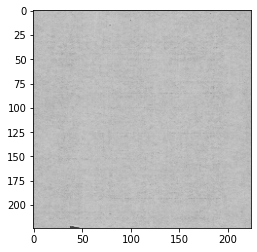

[[0.69486463 0.39221427]]
Blank
1503.jpeg


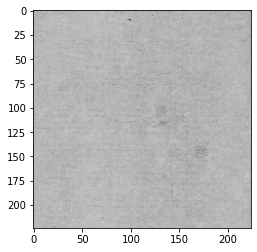

[[0.6550744  0.43485865]]
Blank
1505.jpeg


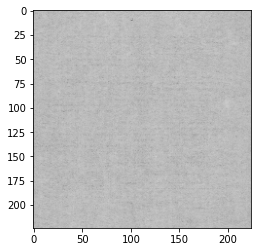

[[0.6838504  0.40955612]]
Blank
1507.jpeg


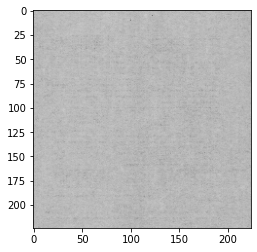

[[0.6643573 0.4306175]]
Blank
1509.jpeg


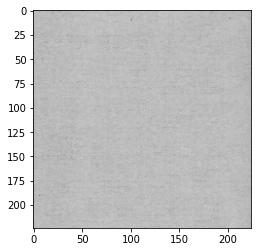

[[0.7240755  0.36621198]]
Blank
1511.jpeg


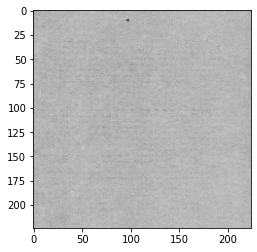

[[0.69573396 0.38890713]]
Blank
1513.jpeg


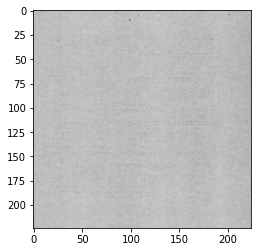

[[0.72898865 0.35903206]]
Blank
1515.jpeg


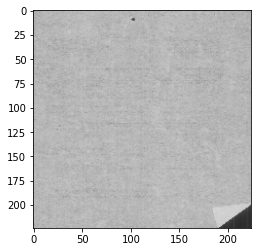

[[0.6985423  0.35172564]]
Blank
1517.jpeg


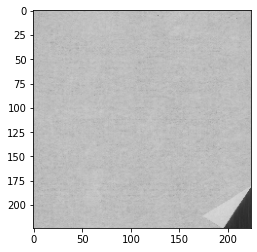

[[0.70757914 0.36034837]]
Blank
1519.jpeg


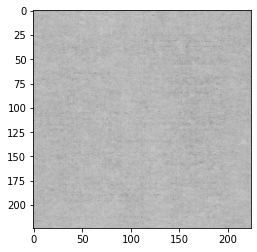

[[0.64073116 0.46324146]]
Blank
1521.jpeg


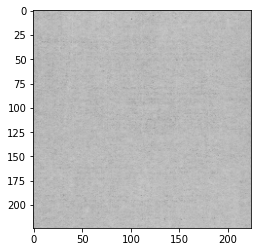

[[0.6769282  0.41356254]]
Blank
1523.jpeg


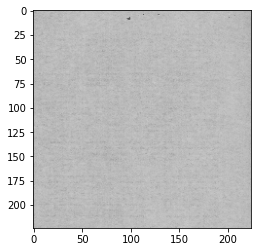

[[0.7463255 0.3241374]]
Blank
1525.jpeg


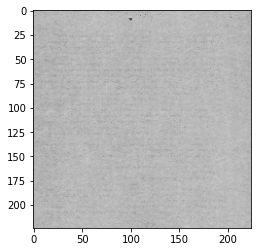

[[0.71542376 0.36475426]]
Blank
1527.jpeg


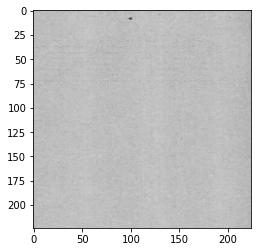

[[0.7802268  0.28128362]]
Blank
1529.jpeg


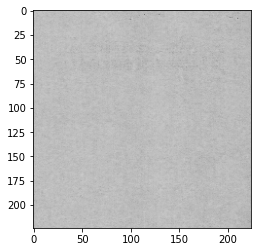

[[0.76844966 0.31021026]]
Blank
1531.jpeg


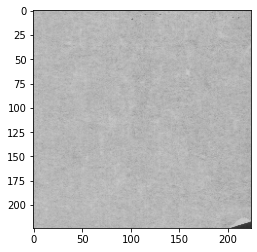

[[0.6067984 0.4632923]]
Blank
1533.jpeg


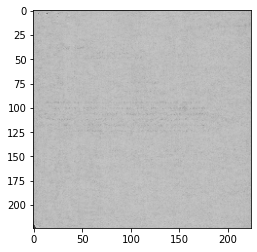

[[0.7541836  0.33209467]]
Blank
1535.jpeg


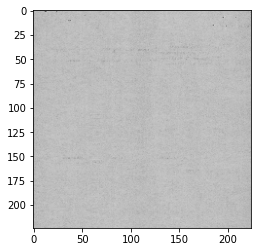

[[0.7787948  0.29182887]]
Blank
1537.jpeg


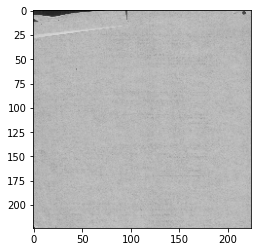

[[0.59899694 0.49865916]]
Blank
1539.jpeg


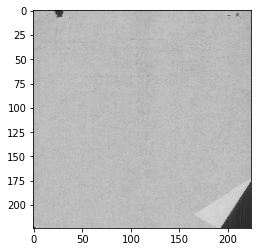

[[0.6245064  0.50128645]]
Blank
1541.jpeg


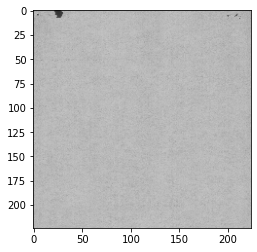

[[0.6554567  0.48320577]]
Blank
1543.jpeg


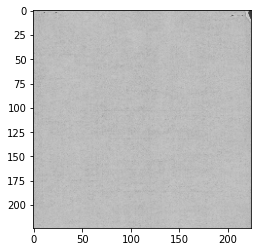

[[0.76483834 0.3154279 ]]
Blank
1545.jpeg


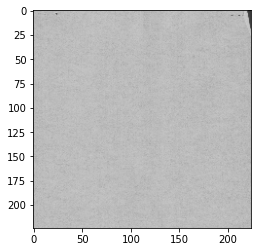

[[0.7800261  0.30244133]]
Blank
1547.jpeg


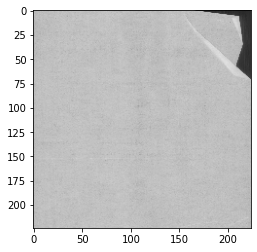

[[0.7824199 0.3041194]]
Blank
1549.jpeg


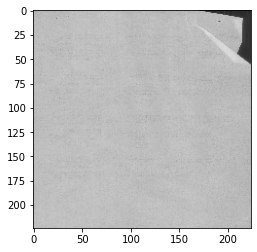

[[0.82791436 0.25528455]]
Blank
1551.jpeg


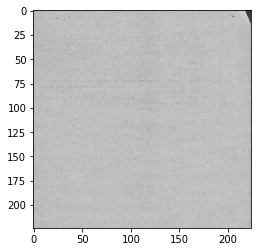

[[0.80550337 0.27468884]]
Blank
1553.jpeg


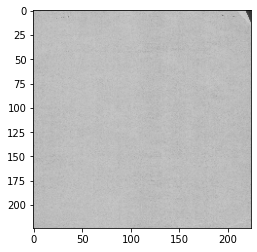

[[0.8118732  0.26008517]]
Blank
1555.jpeg


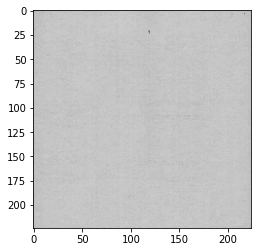

[[0.87257093 0.18545288]]
Blank
1557.jpeg


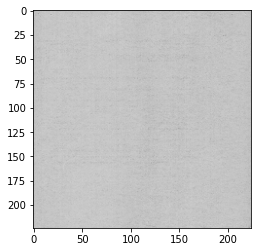

[[0.80850565 0.26174504]]
Blank
1559.jpeg


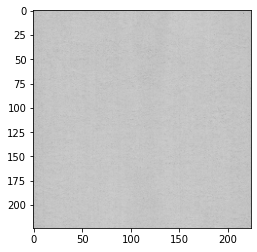

[[0.8375556  0.22576454]]
Blank
1561.jpeg


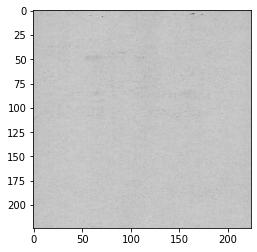

[[0.7827332 0.2963059]]
Blank
1563.jpeg


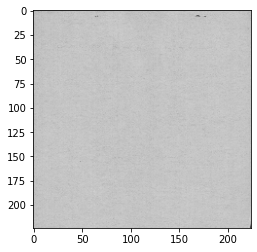

[[0.8106825  0.26285458]]
Blank
1565.jpeg


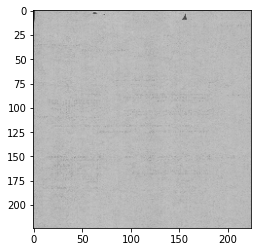

[[0.74589586 0.32479662]]
Blank
1567.jpeg


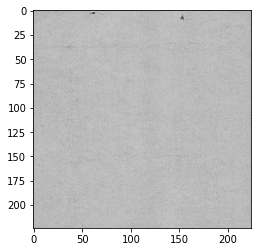

[[0.7721223 0.2935288]]
Blank


,File_Name,Result
0,1435.jpeg,Blank
1,1437.jpeg,Blank
2,1441.jpeg,Blank
3,1443.jpeg,Blank
4,1453.jpeg,Blank
5,1455.jpeg,Blank
6,1457.jpeg,Blank
7,1459.jpeg,Blank
8,1463.jpeg,Blank
9,1465.jpeg,Blank


37.92766284942627


In [33]:
import time

start = time.time()

path = '/home/vimalkumar/Downloads/bad quality/empty'


file_name = []
result = []


for im in sorted(os.listdir(path)):
    print(im)
    img = image.load_img(os.path.join(path,im),
                     target_size=(224,224))
    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = x/255
    x = np.expand_dims(x,axis=0)
    images = np.vstack([x])
    val = model.predict(images)
    print(val)

    a=np.argmax(val,axis=1)
    print(dic[a[0]])
    file_name.append(im)
    result.append(dic[a[0]])
    
df = pd.DataFrame({'File_Name':file_name,'Result':result})
pd.set_option('display.max_rows',1000)
#df.to_excel('/home/vimalkumar/Downloads/new_project (copy)/cnn validation/vgg_cnn_result_3.xlsx')
display(df) 

end = time.time()

print(end - start)